In [56]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from pyik.mplext import ViolinPlot
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import sqlite3

In [51]:
posts_path = "/home/alex/data/stackexchange/overflow/caches/posts.db"
meta_path_2008 = "/home/alex/data/stackexchange/overflow/caches/posts_2008.hdf5"
meta_path_2017 = "/home/alex/data/stackexchange/overflow/caches/posts_2017.hdf5"
word_dict_path = "./dictionaries/words_2008.hdf5"
word_list_path = "./words_observed_100k.hdf5"

In [52]:
conn = sqlite3.connect(posts_path)

In [53]:
store_meta_2008 = pd.HDFStore(meta_path_2008, "r", complib="blosc", complevel=9)
store_meta_2017 = pd.HDFStore(meta_path_2017, "r", complib="blosc", complevel=9)
store_dict = pd.HDFStore(word_dict_path, "r", complib="blosc", complevel=9)
store_words = pd.HDFStore(word_list_path, "r", complib="blosc", complevel=9)

In [36]:
# cols = ["CreationDate", "Id"]
smask = store_meta_2008.select_as_coordinates("posts", "PostTypeId == 1")
# posts = store.select("posts", where=smask, columns=cols)
qs08 = store_meta_2008.select("posts", where=smask)
qs08.set_index("Id", inplace=True, drop=False)

In [37]:
smask = store_meta_2017.select_as_coordinates("posts", "PostTypeId == 1")
qs17 = store_meta_2017.select("posts", where=smask)
qs17.set_index("Id", inplace=True, drop=False)

In [84]:
words = store_dict.select("all")
wordlists = store_words.select("words")
wordlists.set_index("Id", inplace=True, drop=False)

In [73]:
words = words.sort_values(by="n", ascending=False)
words["order"] = np.arange(1, words.shape[0] + 1)
# words = words.drop(544765)
# words = words.drop(430514)
# words

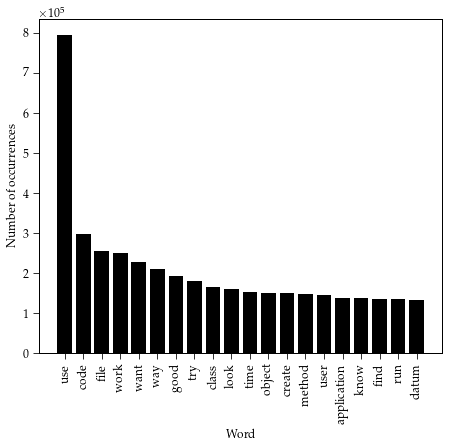

In [79]:
first = words.iloc[:20]
plt.figure(figsize=(8,6))
plt.xlabel(r"Word")
plt.ylabel(r"Number of occurrences")
plt.bar(first.order.values, first.n.values, align="center", color="k")
plt.xticks(first.order.values, first.words.values, rotation=90)
plt.savefig("./plots/mostcommonwords.pdf")

In [57]:
print np.sum(qs08.AnswerCount == 0) * 100. / len(qs08)
print np.sum(qs17.AnswerCount == 0) * 100. / len(qs17)
# most of 2008 questions have a reply
print np.sum(qs08.AnswerCount > 1) * 100. / len(qs08)
print np.sum(qs17.AnswerCount > 1) * 100. / len(qs17)

0.110830718865
30.4609389687
88.3099167917
22.6370638235


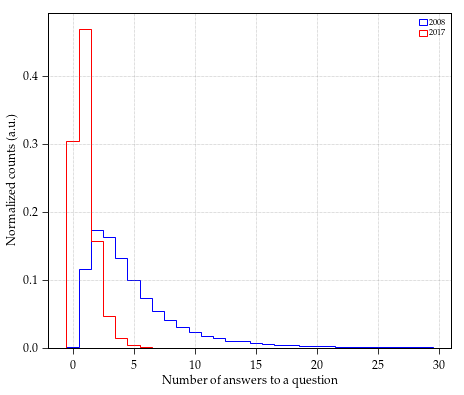

In [55]:
# did the number of answers change with time?
plt.figure(figsize=(8,6))
plt.xlabel(r"Number of answers to a question")
plt.ylabel("Normalized counts (a.u.)")
qs08.AnswerCount.hist(range=[-0.5, 29.5], bins=30, color="b", normed=True, histtype="step", label="2008", axes=plt.gca())
qs17.AnswerCount.hist(range=[-0.5, 29.5], bins=30, color="r", normed=True, histtype="step", label="2017", axes=plt.gca())
plt.legend(loc="best")
plt.savefig("./plots/nanswers_time.pdf")

In [80]:
# convert to datetime objects
qs08["CreationDate"] = pd.to_datetime(qs08.CreationDate, origin="julian", unit="D")

In [81]:
wordlists

,Id,hot_indices,nwords,probs,ratios
0,4,50;3;6;51;41;1;18;56;36;83;31;5;9;53,28,4.589104e-40,0.769231
1,6,54;1;75;79;5,41,2.224215e-77,0.500000
2,7,,7,1.522693e-20,2.000000
3,9,,7,5.992956e-19,0.500000
4,11,28;13,11,3.995684e-26,0.000000
5,12,7,11,1.532654e-27,0.250000
6,13,57;7;95;26;17;37;52,15,1.105982e-27,0.083333
7,14,38;33,11,8.152148e-19,0.000000
8,16,57;55;96;23;7;77;36;87,33,3.200337e-62,0.304348
9,17,54;22;90,7,8.484467e-16,0.250000


In [83]:
# check a single (or multiple) posts
conn.execute("SELECT * FROM posts WHERE id=?", (158743,)).fetchall()

[(158743,
  u'<p>Different approach, get the typeof</p>\n\n<pre><code>if(typeof window.onbeforeunload == \'function\')\n\n{\nalert("hello functionality!");\n}\n</code></pre>\n')]

In [86]:
# join in information about occurring words, probabilities etc
qs08 = qs08.join(wordlists, how="inner", rsuffix="_r")
qs08

,AcceptedAnswerId,AnswerCount,BodyNCodes,BodyNQMarks,BodySize,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,...,PostTypeId,Score,Tags,Title,ViewCount,Id_r,hot_indices,nwords,probs,ratios
Id,,,,,,,,,,,,,,,,,,,,,
4,7,13,3,0,482,-1.000000e+00,5,2.456232e+06,2008-07-31 21:42:52.646400000,37,...,1,506,;c#;winforms;type-conversion;decimal;opacity,While applying opacity to a form should we use...,32399,4,50;3;6;51;41;1;18;56;36;83;31;5;9;53,28,4.589104e-40,0.769231
6,31,5,3,3,754,-1.000000e+00,0,-1.000000e+00,2008-07-31 22:08:08.620800000,8,...,1,223,;html;css;css3;internet-explorer-7,Percentage width child element in absolutely p...,14997,6,54;1;75;79;5,41,2.224215e-77,0.500000
9,1404,60,1,1,112,-1.000000e+00,8,2.455790e+06,2008-07-31 23:40:59.779200000,344,...,1,1546,;c#;.net;datetime,Calculate age in C#,399006,9,,7,5.992956e-19,0.500000
11,1248,33,1,0,165,-1.000000e+00,3,2.455079e+06,2008-07-31 23:55:37.948800000,521,...,1,1205,;c#;datetime;time;datediff;relative-time-span,Calculate relative time in C#,122973,11,28;13,11,3.995684e-26,0.000000
13,-1,24,0,2,172,-1.000000e+00,3,-1.000000e+00,2008-08-01 00:42:38.908800000,123,...,1,495,;javascript;html;browser;timezone;timezoneoffset,Determine a User's Timezone,141997,13,57;7;95;26;17;37;52,15,1.105982e-27,0.083333
14,-1,8,2,1,288,-1.000000e+00,1,-1.000000e+00,2008-08-01 00:59:11.212800000,48,...,1,318,;.net;math,Difference between Math.Floor() and Math.Trunc...,95667,14,38;33,11,8.152148e-19,0.000000
16,12446,5,7,5,1019,-1.000000e+00,0,-1.000000e+00,2008-08-01 04:59:33.619200000,13,...,1,94,;c#;linq;web-services;.net-3.5,Filling a DataSet or DataTable from a LINQ que...,75421,16,57;55;96;23;7;77;36;87,33,3.200337e-62,0.304348
17,26,10,0,1,110,-1.000000e+00,0,-1.000000e+00,2008-08-01 05:09:55.958400000,15,...,1,137,;mysql;database;binary-data;data-storage,Binary Data in MySQL,55816,17,54;22;90,7,8.484467e-16,0.250000
19,531,23,13,0,3460,-1.000000e+00,14,-1.000000e+00,2008-08-01 05:21:22.233600000,72,...,1,246,;performance;algorithm;language-agnostic;unix;pi,What is the fastest way to get the value of π?,38017,19,68;69;1;56;7;43;58;59;19;62;11;81;5;60;28;9;13,90,3.598757e-129,0.450980


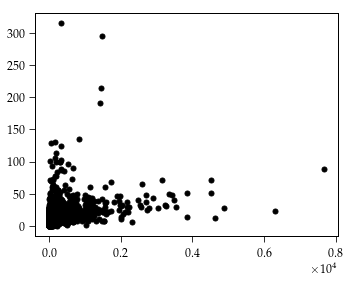

In [89]:
plt.plot(qs08.Score, qs08.AnswerCount, "k.")

In [148]:
#qs08["Tags"] = qs08.Tags.apply(lambda x: x.split(";")[1:])
qs08["hasAnswers"] = qs08.AnswerCount > 1
qs08.head()

,AcceptedAnswerId,AnswerCount,BodyNCodes,BodyNQMarks,BodySize,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,...,Score,Tags,Title,ViewCount,Id_r,hot_indices,nwords,probs,ratios,hasAnswers
Id,,,,,,,,,,,,,,,,,,,,,
4,7,13,3,0,482,-1.0,5,2.456232e+06,2008-07-31 21:42:52.646400,37,...,506,"[c#, winforms, type-conversion, decimal, opacity]",While applying opacity to a form should we use...,32399,4,50;3;6;51;41;1;18;56;36;83;31;5;9;53,28,4.589104e-40,0.769231,True
6,31,5,3,3,754,-1.0,0,-1.000000e+00,2008-07-31 22:08:08.620800,8,...,223,"[html, css, css3, internet-explorer-7]",Percentage width child element in absolutely p...,14997,6,54;1;75;79;5,41,2.224215e-77,0.500000,True
9,1404,60,1,1,112,-1.0,8,2.455790e+06,2008-07-31 23:40:59.779200,344,...,1546,"[c#, .net, datetime]",Calculate age in C#,399006,9,,7,5.992956e-19,0.500000,True
11,1248,33,1,0,165,-1.0,3,2.455079e+06,2008-07-31 23:55:37.948800,521,...,1205,"[c#, datetime, time, datediff, relative-time-s...",Calculate relative time in C#,122973,11,28;13,11,3.995684e-26,0.000000,True
13,-1,24,0,2,172,-1.0,3,-1.000000e+00,2008-08-01 00:42:38.908800,123,...,495,"[javascript, html, browser, timezone, timezone...",Determine a User's Timezone,141997,13,57;7;95;26;17;37;52,15,1.105982e-27,0.083333,True


In [149]:
# attempt ridge regression
from sklearn import base
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from scipy import stats
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [110]:
class ColumnSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_names):
        self.col_names = col_names  # We will need these in transform()
    
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X):
        return X[self.col_names]

In [130]:
from collections import Counter

class DictEncoder(base.BaseEstimator, base.TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # X will come in as a list of lists of lists.  Return a list of
        # dictionaries corresponding to those inner lists.
        a = X.Tags.apply(Counter)
        return a

In [ ]:
# normalizing the "probabilities"
qs08["probs"] = ...

In [159]:
pipe_tags = Pipeline([
        ("cst", ColumnSelectTransformer(["Tags"])),
        ("dec", DictEncoder()),
        ("dvec", DictVectorizer(sparse=False)),
        ("tfid", TfidfTransformer()),
#        ("poly", PolynomialFeatures(degree=2)),  # not working???
        ("ridge", Ridge(alpha=10.0))
#        ("kridge", KernelRidge(alpha=1.))  # runs out of memory quickly while fitting...
#        ("svr", SVR())
    ])

pipe_tags.fit(qs08.iloc[:10000], qs08.AnswerCount.iloc[:10000])
pred = pipe_tags.predict(qs08.iloc[-5000:])
print np.column_stack((pred, qs08.AnswerCount.iloc[-5000:]))
print pipe_tags.score(qs08.iloc[-5000:], qs08.AnswerCount.iloc[-5000:])

[[  7.38565627  10.        ]
 [  5.34840694   9.        ]
 [  6.53064085  11.        ]
 ..., 
 [  8.38536525   6.        ]
 [  4.52649382   5.        ]
 [  7.06544343   5.        ]]
0.0491532412729


In [105]:
from sklearn.pipeline import FeatureUnion

#union = FeatureUnion([
#        ("city", EstimatorTransformer(city_est)),
#        ("latlong", EstimatorTransformer(pipe_latlong)),
#        ("attribute", EstimatorTransformer(pipe_attribute)),
#        ("category", EstimatorTransformer(pipe_category))
#    ])

In [150]:
cv = model_selection.ShuffleSplit(n_splits=20, test_size=0.2, random_state=42)
def compute_error(est, X, y):
    return -model_selection.cross_val_score(est, X, y, cv=cv, scoring='neg_mean_squared_error').mean()

In [144]:
qs08.columns

Index([u'AcceptedAnswerId', u'AnswerCount', u'BodyNCodes', u'BodyNQMarks',
       u'BodySize', u'ClosedDate', u'CommentCount', u'CommunityOwnedDate',
       u'CreationDate', u'FavoriteCount', u'Id', u'LastActivityDate',
       u'LastEditDate', u'LastEditorUserId', u'OwnerUserId', u'ParentId',
       u'PostTypeId', u'Score', u'Tags', u'Title', u'ViewCount', u'Id_r',
       u'hot_indices', u'nwords', u'probs', u'ratios'],
      dtype='object')

In [158]:
pipe_f = Pipeline([
        ("cst", ColumnSelectTransformer(["BodyNCodes", "BodyNQMarks", "BodySize", "nwords", "ratios"])),
        ("poly", PolynomialFeatures(degree=3)),
        ("ridge", Ridge(alpha=10.0))
#        ("kridge", KernelRidge(alpha=1.))  # runs out of memory quickly while fitting...
#        ("svr", SVR())
    ])

pipe_f.fit(qs08.iloc[:10000], qs08.AnswerCount.iloc[:10000])
pred = pipe_f.predict(qs08.iloc[-5000:])
print np.column_stack((pred, qs08.AnswerCount.iloc[-5000:]))
print pipe_f.score(qs08.iloc[-5000:], qs08.AnswerCount.iloc[-5000:])

print compute_error(pipe_f, qs08, qs08.AnswerCount)

[[  6.37887676  10.        ]
 [  7.93667017   9.        ]
 [  7.37769166  11.        ]
 ..., 
 [  6.22452785   6.        ]
 [  7.33922674   5.        ]
 [  6.62681383   5.        ]]
-0.027440414394
308.733808025


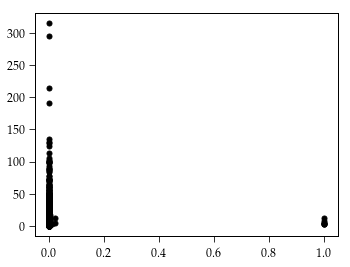

In [166]:
plt.plot(qs08.probs, qs08.AnswerCount, "k.")